# Convergence to Interpolating Solution

In [1]:
from data_pre_processing.fetch_data import *
from data_pre_processing.fill_missing_values import *
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Fetch and Prepare

In [2]:
X, y = get_X_Y_train()
X = fill_with_zeros(X)
X = X[:50,1,:] # only ratings
y = y[:50]

# Lasso

In [3]:
from sklearn import linear_model
from numpy import linalg

In [ ]:
rss = []
norms = []
for e in range(0,10):
    lasso_regressor = linear_model.Lasso(alpha=2**-e)
    lasso_regressor.fit(X,y)
    y_pred = lasso_regressor.predict(X)
    rss.append(np.sum((y-y_pred)**2))
    norms.append(linalg.norm(lasso_regressor.coef_, ord=1))

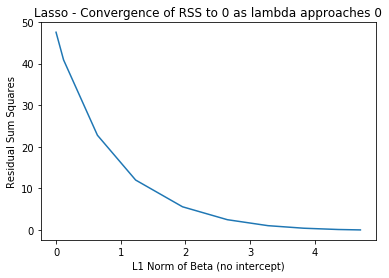

In [5]:
plt.figure()
plt.plot(norms, rss)
plt.xlabel('L1 Norm of Beta (no intercept)')
plt.ylabel('Residual Sum Squares')
plt.title('Lasso - Convergence of RSS to 0 as lambda approaches 0')
plt.show()

# Ridge

In [6]:
rss = []
norms = []
for e in range(-15,10):
    ridge_regressor = linear_model.Ridge(alpha=2**-e)
    ridge_regressor.fit(X,y)
    y_pred = ridge_regressor.predict(X)
    rss.append(np.sum((y-y_pred)**2))
    norms.append(linalg.norm(ridge_regressor.coef_, ord=2))

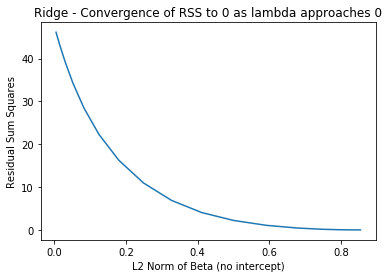

In [7]:
plt.figure()
plt.plot(norms, rss)
plt.xlabel('L2 Norm of Beta (no intercept)')
plt.ylabel('Residual Sum Squares')
plt.title('Ridge - Convergence of RSS to 0 as lambda approaches 0')
plt.show()

# Comparing norms of limiting solutions

In [8]:
alpha = 2**-10

ridge_regressor = linear_model.Ridge(alpha=alpha)
ridge_regressor.fit(X,y)

lasso_regressor = linear_model.Lasso(alpha=alpha)
lasso_regressor.fit(X,y)

/home/jonathansomer/.virtualenvs/ml/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.0009765625, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [9]:
ridge_beta = ridge_regressor.coef_
lasso_beta = lasso_regressor.coef_

In [10]:
from tabulate import tabulate

rows = [
        ["-", "l1", "l2", "RSS"],
        ["Ridge", np.linalg.norm(ridge_beta, ord=1), np.linalg.norm(ridge_beta, ord=2)],
        ["Lasso", np.linalg.norm(lasso_beta, ord=1), np.linalg.norm(lasso_beta, ord=2)],
       ]


print(tabulate(rows, headers="firstrow", tablefmt="latex"), sep=' ', end='', flush=True)

\begin{tabular}{lrr}
\hline
 -     &      l1 &       l2 \\
\hline
 Ridge & 6.53657 & 0.854421 \\
 Lasso & 4.89002 & 1.15291  \\
\hline
\end{tabular}

# Kernel Absolute Regression

In [11]:
X, y = get_X_Y_train()
X = fill_with_zeros(X)
X = X[:100,1,:] # only ratings
y = y[:100]

In [12]:
from sklearn.svm import SVR

# 1. Convergence of SVR to interpolating solutions

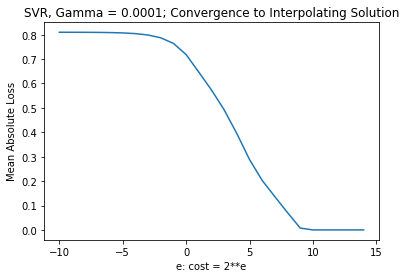

In [13]:
exponents = [i for i in range(-10,15)]

losses = []
for e in exponents:
    model = SVR(gamma=0.0001, C=2**e, epsilon=0)
    model.fit(X,y)
    y_pred = model.predict(X)
    mean_absolute_loss = np.mean(np.abs(y - y_pred))
    losses.append(mean_absolute_loss)

plt.figure()
plt.plot(exponents, losses)
plt.xlabel('e: cost = 2**e')
plt.ylabel('Mean Absolute Loss')
plt.title("SVR, Gamma = 0.0001; Convergence to Interpolating Solution")
plt.show()


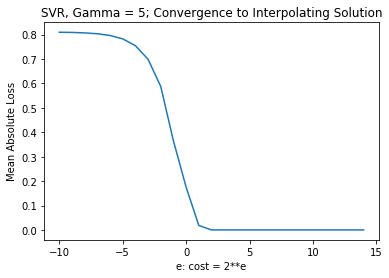

In [14]:
losses = []
for e in exponents:
    model = SVR(gamma=5.0, C=2**e, epsilon=0)
    model.fit(X,y)
    y_pred = model.predict(X)
    mean_absolute_loss = np.mean(np.abs(y - y_pred))
    losses.append(mean_absolute_loss)

plt.figure()
plt.plot(exponents, losses)
plt.xlabel('e: cost = 2**e')
plt.ylabel('Mean Absolute Loss')
plt.title("SVR, Gamma = 5; Convergence to Interpolating Solution")
plt.show()

# Comparing the resulting interpolation models

In [15]:
cost = np.exp(15)
extrapolation_x = np.repeat(5,99).reshape(1,-1)

In [16]:
large_gamma_model = SVR(gamma=5.0, C=cost, epsilon=0)
large_gamma_model.fit(X,y)

small_gamma_model = SVR(gamma=0.0001, C=cost, epsilon=0)
small_gamma_model.fit(X,y)

SVR(C=3269017.3724721107, cache_size=200, coef0=0.0, degree=3, epsilon=0,
  gamma=0.0001, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
  verbose=False)

## Small Gamma at extrapolation point

In [17]:
small_gamma_model.predict(extrapolation_x)

array([3.25716084])

## Large Gamma at extrapolation point

In [18]:
large_gamma_model.predict(extrapolation_x)

array([3.59001736])

In [19]:
rows = [
        ["-", "prediction at extrapolation point"],
        ["Gamma = 0.0001", 3.257],
        ["Gamma = 5", 3.590]
       ]


print(tabulate(rows, headers="firstrow", tablefmt="latex"), sep=' ', end='', flush=True)

\begin{tabular}{lr}
\hline
 -              &   prediction at extrapolation point \\
\hline
 Gamma = 0.0001 &                               3.257 \\
 Gamma = 5      &                               3.59  \\
\hline
\end{tabular}

In [20]:
print(large_gamma_model.predict(extrapolation_x))
print(np.mean(y))

[3.59001736]
3.59


In [21]:
np.max(np.mean(X, axis=1))

4.333333333333333

In [22]:
print(large_gamma_model.predict(np.repeat(0,99).reshape(1,-1)))
print(large_gamma_model.predict(np.repeat(10,99).reshape(1,-1)))
print(large_gamma_model.predict(np.repeat(500,99).reshape(1,-1)))

[3.59001736]
[3.59001736]
[3.59001736]


In [23]:
noise = np.random.normal(loc=0, scale=0.0001, size = 99)

sample = X[61]
close_sample = sample + noise

large_gamma_model.predict(close_sample.reshape(1,-1))

array([4.00017173])

In [24]:
print("The Norms: ||x - x_i||^2_2")
distances_from_all_training_samples = np.linalg.norm(X - extrapolation_x, ord=2, axis=1)
print(stats.describe(distances_from_all_training_samples))

gamma = 5
print("The Values of K(x,x_i)")
print(stats.describe(np.exp(-gamma*distances_from_all_training_samples)))

The Norms: ||x - x_i||^2_2
DescribeResult(nobs=100, minmax=(9.899494936611665, 41.42463035441596), mean=22.728258642865168, variance=28.89521117477272, skewness=0.5777584628042024, kurtosis=0.7316662573137216)
The Values of K(x,x_i)
DescribeResult(nobs=100, minmax=(1.115727431793512e-90, 3.1880114828227525e-22), mean=3.1880114838747833e-24, variance=1.0163417214541968e-45, skewness=9.849370589540284, kurtosis=95.01010101010102)


In [25]:
print("The Norms: ||x_0 - x_i||^2_2")
distances_from_all_training_samples = np.linalg.norm(X - X[0], ord=2, axis=1)
print(distances_from_all_training_samples[:15])

gamma = 5
print("The Values of K(x_0,x_i)")
print(np.exp(-gamma*distances_from_all_training_samples[:15]))

The Norms: ||x_0 - x_i||^2_2
[ 0.         19.13112647 29.13760457 19.84943324 20.68816087 17.80449381
 25.05992817 23.87467277 29.78254522 19.28730152 21.67948339 18.33030278
 16.61324773 18.38477631 20.61552813]
The Values of K(x_0,x_i)
[1.00000000e+00 2.86606944e-42 5.35174731e-64 7.89774981e-44
 1.19187161e-45 2.17787483e-39 3.82875335e-55 1.43485094e-52
 2.12826039e-65 1.31267402e-42 8.38687111e-48 1.57127882e-40
 8.40990192e-37 1.19664543e-40 1.71375787e-45]
